# MiniProject 1: Storage capacity in biologically plausible Hopfield networks #

## Ex 3. Separate inhibitory population ##

Let's study the capacity of a Hopfield network with stochastic binary neurons and low-activity patterns with the following model:
This model is proposed in the paper by [Tsodyks and Feigel’man (1988)] and discussed briefly in Chapter 17.2.6 of the book Neuronal Dynamics.
Given a neuron’s continuous state $S_i(t) = [-1, 1]$, we define the binary, stochastic spike variable $\sigma_i(t) = \{0, 1\}$ as: 
$$
P \{ \sigma_i(t) = +1 | S_i(t) \} = \frac{1}{2} (S_i(t) + 1)
$$
where $\sigma_i = 1$ can be interpreted as a spike and $\sigma_i = 0$ as the quiescent state of the neuron. The states update according to: 
$$
S_i(t + 1) = \phi \left( \sum_{j=1}^N w_{ij} \sigma_j(t) - \theta \right)
$$
where $\phi (h) = \text{tanh}(4h)$ and the constant $\theta$ is the neuronal "firing threshold". Synaptic weights are set according to: 
$$
w_{ij} = \frac{c}{N} \sum_{\mu = 1}^M (\xi_i^\mu - b) (\xi_j^\mu -a)
$$
where $c = \frac{2}{a(1-a)}$, and $a$, $b$ are constants in the $[0, 1]$ interval. Here, each component $\xi_i^{\mu} \in \{ 0, 1 \}$ of the patterns has a probability $a$ of being 1, which we call the activity (or sparseness). Therefore, $a$ is the mean activity of the patterns.

**Ex 3. Separate inhibitory population**

In a more biologically plausible model, the outgoing synapses from a given neuron cannot be both inhibitory and excitatory (that is, negative and positive): this is the Dale’s law, stating that each neuron should be either inhibitory or excitatory (with negative or positive outgoing weights). In this section, we see how a Hopfield network can include separate inhibitory and excitatory populations. We continue working with the same binary stochastic spike variables $\sigma_i(t)$, and with random patterns $\xi_i^{\mu} \in \{ 0, 1 \}$ with a mean activity of $a$. Patterns are stored in a population of excitatory neurons that receive negative feedback from an inhibitory population. The synaptic weight from excitatory neuron $j$ to excitatory neuron $i$ is given by: 
$$
W^{E \leftarrow E}_{ij} = \frac{c}{N} \sum_{\mu} \xi_i^{\mu} \xi_j^{\mu}
$$
The inhibitory population is composed of $N_I$ neurons. Each inhibitory neuron $k$ receives input from $\textbf{exactly}$ $K$ excitatory neurons, selected at random in the excitatory population, with synaptic strength 
$$
W^{I \leftarrow E}_{ki} = \frac{1}{K}
$$
Each excitatory neuron $i$ receives $\textit{negative}$ input from inhibitory neuron $k$ with weight: 
$$
W^{E \leftarrow I}_{ik} = \frac{ca}{N_I} \sum_{\mu} \xi_i^{\mu}
$$
Finally, we assume that inhibitory neurons have a linear gain function: their state is a stochastic spike variable $\sigma_k^I \in \{ 0, 1 \}$, that updates according to:
$$
P \{ \sigma_k^I(t + 1) = 1 | h_k^I(t) \} = h_k^I(t)
$$
where $h_k^I$ is the input received by inhibitory neuron $k$. Excitatory neurons update with this dynamic, where 
$$
S_i(t) = \phi(h_i(t) - \theta)
$$
and $h_i$ is the total (excitatory and inhibitory) input received by excitatory neuron $i$.

## Ex 3.1

To write down the total input to an excitatory and an inhibitory neuron, we need to consider the contributions from both populations:

**Total input to an excitatory neuron i:**
$$
h_i(t) = \sum_{j=1}^{N} W_{ij}^{E \leftarrow E} \sigma_j(t) - \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t)
$$
where:
- $W_{ij}^{E \leftarrow E} = \frac{c}{N} \sum_{\mu} \xi_i^{\mu} \xi_j^{\mu}$
- $W_{ik}^{E \leftarrow I} = \frac{ca}{N_I} \sum_{\mu} \xi_i^{\mu}$
- $\sigma_j(t)$ is the stochastic binary spike variable of excitatory neuron $j$ at time $t$
- $\sigma_k^I(t)$ is the stochastic binary spike variable of inhibitory neuron $k$ at time $t$

**Total input to an inhibitory neuron k:**
$$
h_k^I(t) = \sum_{i \in \mathcal{K}(k)} W_{ik}^{I \leftarrow E} \sigma_i(t)
$$
where:
- $\mathcal{K}(k)$ denotes the set of $K$ excitatory neurons that project to inhibitory neuron $k$
- $W_{ik}^{I \leftarrow E} = \frac{1}{K}$
- $\sigma_i(t)$ is the stochastic binary spike variable of excitatory neuron $i$ at time $t$

Since the model adheres to Dale's law and the problem statement does not specify any inhibitory-to-inhibitory neuron connections, we can reasonably assume that $W_{ij}^{I \leftarrow I}$ is not defined and effectively zero in this context. In other words, there are no direct inhibitory-to-inhibitory neuron connections in the model described. Thus:
$$
W_{ij}^{I \leftarrow I} = 0
$$
This assumption aligns with the biological plausibility imposed by Dale's law, where each neuron either solely excites or solely inhibits but does not form connections of both types.

### Average Input to an Excitatory Neuron

Next, we will show that the average input to an excitatory neuron is equivalent to the input to a neuron in the model of Exercise 2, for $b = 0$.

First, consider the average input from excitatory neurons to excitatory neuron $i$:
$$
\left\langle \sum_{j=1}^N W_{ij}^{E \leftarrow E} \sigma_j(t) \right\rangle = \left\langle \sum_{j=1}^N \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \xi_j^{\mu} \sigma_j(t) \right\rangle
$$
Since $\langle \sigma_j(t) \rangle = a$, where $a$ is the mean activity:
$$
= \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} \langle \sigma_j(t) \rangle
$$
$$
= \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} a
$$
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu}
$$

Now, consider the average input from inhibitory neurons to excitatory neuron $i$:
$$
\left\langle \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t) \right\rangle = \left\langle \sum_{k=1}^{N_I} \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sigma_k^I(t) \right\rangle
$$
Using the fact that $\langle \sigma_k^I(t) \rangle \approx \left\langle h_k^I(t) \right\rangle \approx K \cdot \frac{1}{K} \cdot a$, and approximating:
$$
= \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{k=1}^{N_I} \langle \sigma_k^I(t) \rangle
$$
$$
= \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} N_I a
$$
Dividing and multiplying by N:
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} N a
$$
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N a
$$

Combining both inputs:
$$
\left\langle h_i(t) \right\rangle = \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} - \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N a = \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \left( \xi_j^{\mu} - a \right)
$$
Thus, the average input to an excitatory neuron in this model is equivalent to the input to a neuron in the model of Exercise 2 for $b = 0$ with $c = \frac{2}{a^2 (1-a)}$

## Ex 3.2

### Total input to excitatory neuron with overlap

$$
\sum_{j=N_I + 1}^N W_{ij}^{E \leftarrow E} \sigma_j(t) = \sum_{j=N_I + 1}^N \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \xi_j^{\mu} \sigma_j(t) = \sum_{\mu=1}^M \xi_i^{\mu} \frac{c}{N} \sum_{j=N_I + 1}^N \xi_j^{\mu} \sigma_j(t) = \sum_{\mu=1}^M \xi_i^{\mu} m^{\mu}_{E \leftarrow E}
$$
$$
\sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t) = \sum_{k=1}^{N_I} \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sigma_k^I(t) = ca \sum_{\mu=1}^M \xi_i^{\mu} \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^I(t) \right)
$$

So, $h_i(t)$ and $h_k^I(t)$ can be computed as such:
$$
h_i(t) = \sum_{\mu=1}^M \xi_i^{\mu} \left[ m^{\mu}_{E \leftarrow E} - ca \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^I(t) \right) \right]
$$
$$
h_k^I(t) = \sum_{i \in \mathcal{K}(k)} W_{ki}^{I \leftarrow E} \sigma_i(t) = \sum_{i \in \mathcal{K}(k)} \frac{1}{K} \sigma_i(t)
$$

In [152]:
from importlib import reload
import helper_functions
import helper_functions_ex3
import helper_functions_ex3_states
reload(helper_functions)
reload(helper_functions_ex3)
reload(helper_functions_ex3_states)

<module 'helper_functions_ex3_states' from '/Users/msaillen/Desktop/Travail/EPFL/Neuronal Dynamics/Mini-project-NX/helper_functions_ex3_states.py'>

In [153]:
# We now set the mean pattern activity to a = 0.1, the threshold to θ = 1, the size of the populations to N = 300 and NI = 80, and K = 60.

cst = {
    "N": 300,                 # Number of neurons
    "N_I": 8,                # Number of inhibitory neurons
    "K": 60,                  # Number of excitatory neurons from which each inhibitory neuron receives an input
    "a": 0.1,                 # Mean pattern activity
    "theta": 1,               # Threshold
    "M": 5,                   # Number of patterns
    "beta": 4,                # The temperature
    "T": 8,                  # Number of steps
    "nr_flips": 5,            # Number of flips
    "T_f": 50,                # Number of steps for the final state
    "c_f": 0.05,              # The percentage of flipped bits for the final state
}

cst["nr_flips_f"] = int(cst["c_f"] * cst["N"]) # Number of flips for the final state

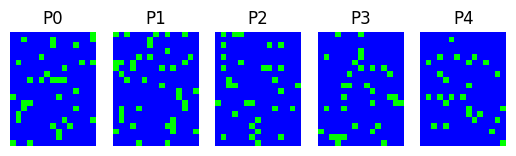

In [154]:
from helper_functions_ex3 import generate_random_patterns, flip_and_iterate
from neurodynex3.hopfield_network import plot_tools

weights, pattern_list, shape = generate_random_patterns(cst)
plot_tools.plot_pattern_list(pattern_list)
noisy_init_pattern_sync, sigmas_list_sync, sigmas_list_as_patterns_sync = flip_and_iterate(cst, shape, pattern_list)
noisy_init_pattern_seq, sigmas_list_seq, sigmas_list_as_patterns_seq = flip_and_iterate(cst, shape, pattern_list, function_name="seq")

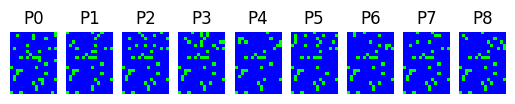

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0

In [155]:
plot_tools.plot_pattern_list(sigmas_list_as_patterns_sync)
print(sigmas_list_as_patterns_sync)


Sigmas:  [-1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1]
Pattern normalized:  [-1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1

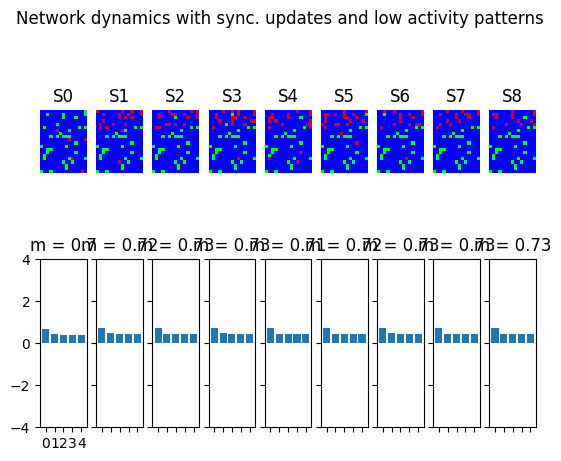

With 8 steps, the network did not converge to the stored pattern.
The overlap is 1.7481481481481482


In [156]:
from helper_functions import study_overlap_low_activity
from helper_functions_ex3 import plot_state_sequence_and_overlap

plot_state_sequence_and_overlap(sigmas_list_as_patterns_sync, pattern_list, overlap_from=cst["N_I"], suptitle="Network dynamics with sync. updates and low activity patterns")

overlap = study_overlap_low_activity(sigmas_list_as_patterns_sync, pattern_list, cst["T"], cst["a"])


[ 2.26666667  0.21481481  0.14074074  0.05925926 -0.04444444]
[ 1.74814815  0.28888889  0.14074074  0.05925926 -0.11851852]
[ 1.67407407  0.21481481 -0.00740741 -0.01481481 -0.04444444]
[ 1.74814815  0.28888889 -0.00740741 -0.01481481 -0.11851852]
[ 1.74814815  0.36296296  0.06666667 -0.01481481 -0.11851852]
[ 1.6         0.21481481 -0.00740741 -0.01481481 -0.11851852]
[ 1.74814815  0.28888889 -0.00740741  0.05925926 -0.04444444]
[ 1.67407407  0.21481481 -0.08148148 -0.01481481 -0.19259259]
[ 1.67407407  0.14074074 -0.08148148 -0.01481481 -0.11851852]


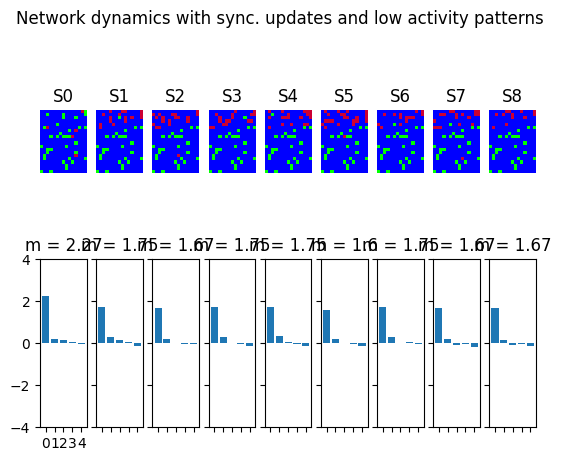

With 8 steps, the network did not converge to the stored pattern.
The overlap is 1.674074074074074


In [157]:
from helper_functions import study_overlap_low_activity, plot_state_sequence_and_overlap_low

plot_state_sequence_and_overlap_low(sigmas_list_as_patterns_seq, pattern_list, cst["a"], reference_idx=0, suptitle="Network dynamics with sync. updates and low activity patterns")

overlap = study_overlap_low_activity(sigmas_list_as_patterns_seq, pattern_list, cst["T"], cst["a"])